In [52]:
import numpy as np
import matplotlib.pyplot as plt
from modules.Particle import Particle
from modules.Direct_Classes import Direct
from modules.FMM_Classes import FMM
from modules.Analytic_Classes import SingleParticle
%load_ext autoreload
%autoreload 2
from modules.testing import PointTesting
import copy
import modules.Utility as util


# Create particle distribution to be used in all simulations
#np.random.seed(100)
n_particles = 1000
max_property = 0 # property could be mass or charge 
box_size = 1000

# Generate initial particles
#initial_positions = np.random.beta(2,2,(n_particles,2)) * box_size
#initial_positions = np.random.uniform(0,1,(n_particles,2)) * box_size
initial_positions=[]
line_n = int(np.sqrt(n_particles))
start_inset = box_size/(line_n+1)
for x in np.linspace(start_inset, box_size - start_inset, line_n, True):
    for y in np.linspace(start_inset, box_size - start_inset, line_n, True):
        initial_positions.append(np.array([x, y])) 
initial_positions = np.array(initial_positions)

initial_particles = []
for initial_position in initial_positions:
    initial_particles.append(Particle(initial_position, np.random.uniform(0,max_property)))
    
point = 620
charge = 1
initial_particles.append(Particle(np.array([point,point]), charge))



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Analytic Potential Graph

/Users/thomashartigan/Documents/Uni/part II/Computing_Project/.computing_project_venv/lib/python3.11/site-packages/matplotlib/tri/_triangulation.py:181: ComplexWarning: Casting complex values to real discards the imaginary part
  triangles = np.asarray(triangles, dtype=np.int32)
/Users/thomashartigan/Documents/Uni/part II/Computing_Project/modules/Analytic_Classes.py:13: RuntimeWarning: divide by zero encountered in log
  particle.total_potential = -self.property * np.log(abs(particle.complex_position - self.complex_position))
/Users/thomashartigan/Documents/Uni/part II/Computing_Project/modules/Analytic_Classes.py:13: RuntimeWarning: invalid value encountered in scalar multiply
  particle.total_potential = -self.property * np.log(abs(particle.complex_position - self.complex_position))


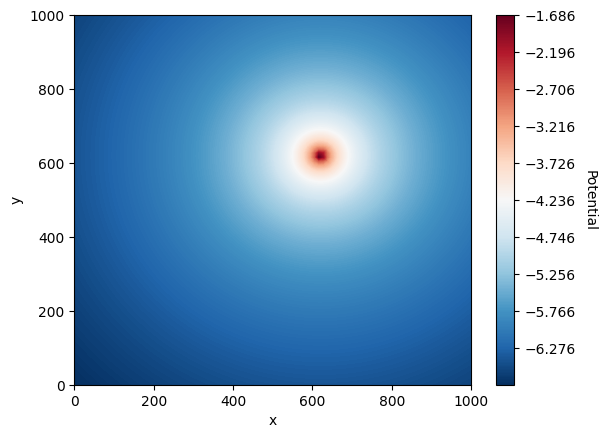

In [53]:
analytic_simulation = SingleParticle([point, point], charge, box_size)
analytic_simulation.plot_potential()
analytic_particles = copy.deepcopy(initial_particles)
analytic_simulation.evaluate_particle_potentials(analytic_particles)

## FMM Potential Graph

In [54]:
# FMM Simulation
expansion_order = 10
n_levels = 0
fmm_particles = copy.deepcopy(initial_particles)
fmm_simulation = FMM(box_size, fmm_particles, n_levels, p=expansion_order)
fmm_results = fmm_simulation.run(plotting = True, z_range = [None,0], x_range=[0,box_size], y_range=[0,box_size], z_levels=10000)

1
2
coarse level:  4
coarse level:  3
coarse level:  2
coarse level:  1
coarse level:  0
3
local expansion level:  1
local expansion level:  2
local expansion level:  3
local expansion level:  4
local expansion level:  5
4
5


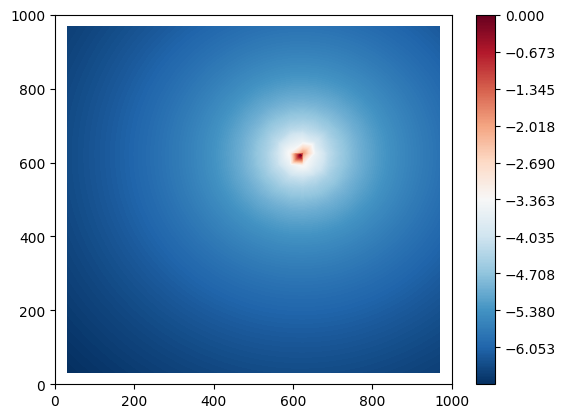

In [55]:
fmm_results.fig

## Multipole Expansion About a Specified Meshbox
This is then also compared to the analytic result

Expected radius of convergence (at lowest level, for higher levels, should add z_0 as well) 176.7766952966369


/Users/thomashartigan/Documents/Uni/part II/Computing_Project/.computing_project_venv/lib/python3.11/site-packages/matplotlib/tri/_tricontour.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = float(z_check.max())
/Users/thomashartigan/Documents/Uni/part II/Computing_Project/.computing_project_venv/lib/python3.11/site-packages/matplotlib/tri/_tricontour.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = float(z_check.min())
/Users/thomashartigan/Documents/Uni/part II/Computing_Project/.computing_project_venv/lib/python3.11/site-packages/matplotlib/contour.py:1234: ComplexWarning: Casting complex values to real discards the imaginary part
  self.levels = np.asarray(levels_arg, np.float64)
/Users/thomashartigan/Documents/Uni/part II/Computing_Project/.computing_project_venv/lib/python3.11/site-packages/matplotlib/tri/_tricontour.py:46: ComplexWarning: Casting complex values to real discards the imag

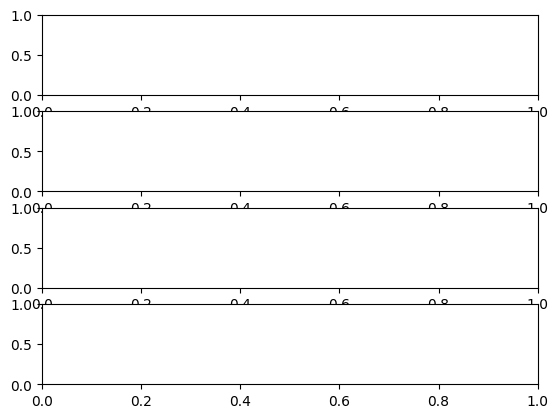

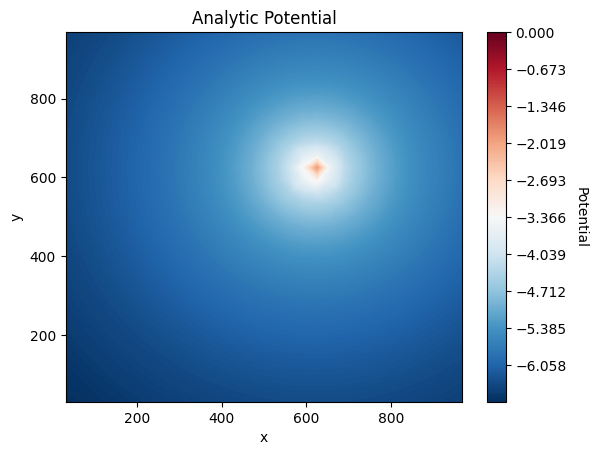

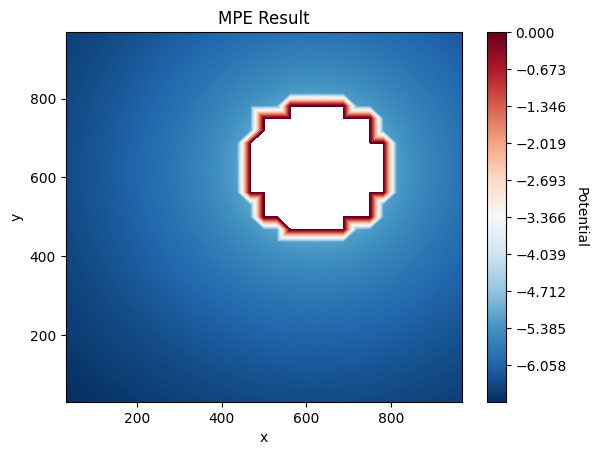

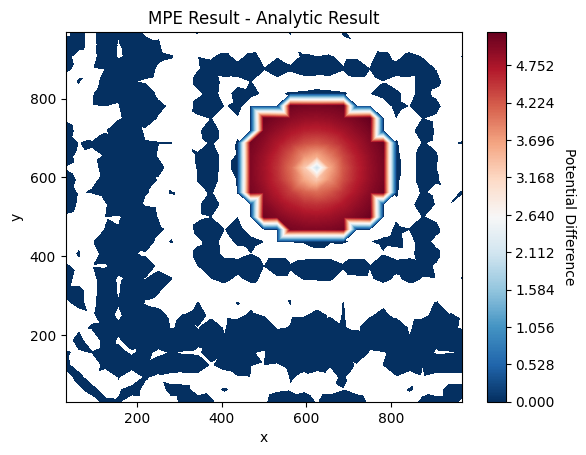

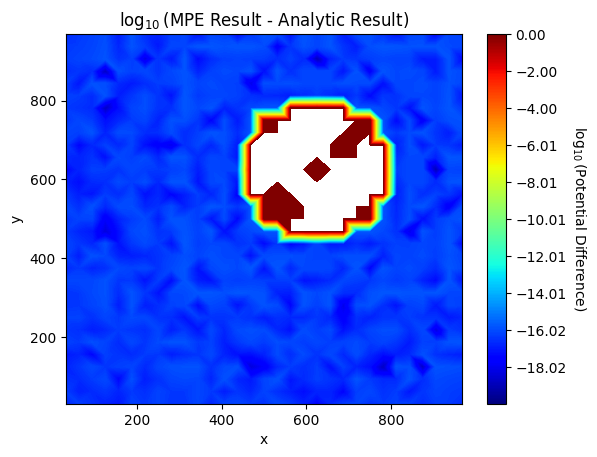

In [94]:
test_positions = initial_positions

test_particles = []
for test_position in test_positions:
    test_particles.append(Particle(test_position, 0))

test_meshbox = fmm_simulation.mesh.meshboxes[2][2][2]
r = test_meshbox.width * np.sqrt(2)/2 #(box_size / int(np.sqrt(n_particles))) * (2**(test_meshbox.mesh.n_levels-test_meshbox.level))*np.sqrt(2)
print("Expected radius of convergence (at lowest level, for higher levels, should add z_0 as well)", r)
point_test = PointTesting(test_particles, test_meshbox, r)
point_test.test_mpe()
point_test_fig, point_test_axs = plt.subplots(4,1)
analytic_results = util.calc_potential_results(analytic_particles, fig = point_test_fig, ax = point_test_axs[0][0], z_range=[None,0], title="Analytic Potential")
test_results = util.calc_potential_results(test_particles, fig = point_test_fig, ax = point_test_axs[1][0], z_range=[None, 0], title = "MPE Result")
test_analytic_diff_results = util.calc_difference_results(test_particles, analytic_particles, fig = point_test_fig, ax = point_test_axs[2][0], z_range=[None, None], title = "MPE Result - Analytic Result")
log_test_analytic_diff_results = util.calc_log_relative_error_results(point_test.particles, analytic_particles, fig = point_test_fig, ax = point_test_axs[3][0], z_range=[-20,0], title = r"$\log_{10}(\text{MPE Result - Analytic Result})$")


In [95]:
analytic_results.fig
plt.show()
test_results.fig
plt.show()
test_analytic_diff_results.fig
plt.show()
log_test_analytic_diff_results.fig
plt.show()

In [96]:
util.plot_difference(analytic_particles, fmm_particles, [-0.2,0.2], x_range=[0,box_size], y_range=[0,box_size])
util.plot_log_relative_errors(fmm_particles, analytic_particles, [-20,0], x_range=[0,box_size], y_range=[0,box_size])
util.plot_potentials(fmm_particles, [None,0], x_range=[0,box_size], y_range=[0,box_size], z_levels=10000)
util.plot_potentials(analytic_particles, [None,0], x_range=[0,box_size], y_range=[0,box_size])
#fmm_simulation.plot_potential()
#analytic_simulation.plot_potential()

AttributeError: module 'modules.Utility' has no attribute 'plot_difference'

In [ ]:
print(fmm_simulation.mesh.meshboxes[0][0][0].mpe_coefficients)

[ 1.00000000e+000+0.00000000e+000j -1.20000000e+002-1.20000000e+002j
  0.00000000e+000-1.44000000e+004j  1.15200000e+006-1.15200000e+006j
  2.07360000e+008+0.00000000e+000j  1.99065600e+010+1.99065600e+010j
  0.00000000e+000+3.98131200e+012j -4.09506377e+014+4.09506377e+014j
 -8.59963392e+016+0.00000000e+000j -9.17294285e+018-9.17294285e+018j
  0.00000000e+000-1.98135566e+021j  2.16147890e+023-2.16147890e+023j
  4.75525357e+025+0.00000000e+000j  5.26735780e+027+5.26735780e+027j
  0.00000000e+000+1.17386831e+030j -1.31473251e+032+1.31473251e+032j
 -2.95814815e+034+0.00000000e+000j -3.34096728e+036-3.34096728e+036j
  0.00000000e+000-7.57285955e+038j  8.60914400e+040-8.60914400e+040j
  1.96288604e+043+0.00000000e+000j  2.24329385e+045+2.24329385e+045j
  0.00000000e+000+5.13921521e+047j -5.89881341e+049+5.89881341e+049j
 -1.35681002e+052+0.00000000e+000j -1.56278393e+054-1.56278393e+054j
  0.00000000e+000-3.60847589e+056j  4.16386666e+058-4.16386666e+058j
  9.68639299e+060+0.00000000e+000j